In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
#import Ipynb_importer

import torch.nn as nn

In [2]:
results = np.load("example_run.npy", allow_pickle=True).item()

In [4]:
split = 0.75

X = results['X']
Y = results['Y']
A1 = results['A1']
S1 = results['S1']
A2 = results['A2']
S2 = results['S2']
#B = results['B']
#pred = results['pred']
loss_nmf = results['loss_nmf']
loss_classification = results['loss_classification']

idx_to_word = results['words'] 

sub=100
L = np.zeros((6, Y.shape[0]))
for i in range(10):
    L[:,i*sub:i*sub+(int(split*sub))] = 1

In [5]:
Y_true = np.zeros((6,Y.shape[0]))
r = np.arange(Y.shape[0])
Y_true[[Y,r]] = 1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
Y_true[:,L[0]==1].shape

(6, 750)

In [24]:
B = np.multiply(Y_true,L) @ np.linalg.pinv(S1)
Y_pred = np.argmax(B @ S1, axis=0)

print("Layer 1 Accuracy: {}".format(Y[L[0]==0][Y_pred[L[0]==0]==Y[L[0]==0]].shape[0] / Y[L[0]==0].shape[0]))

B = np.multiply(Y_true,L) @ np.linalg.pinv(S2)


Y_pred = np.argmax(B @ S2, axis=0)

print("Layer 2 Accuracy: {}".format(Y[L[0]==0][Y_pred[L[0]==0]==Y[L[0]==0]].shape[0] / Y[L[0]==0].shape[0]))

Layer 1 Accuracy: 0.744
Layer 2 Accuracy: 0.724


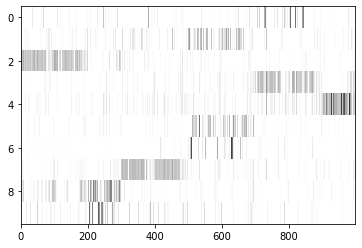

In [13]:
plt.imshow(S1,aspect='auto',cmap='binary',interpolation='none')

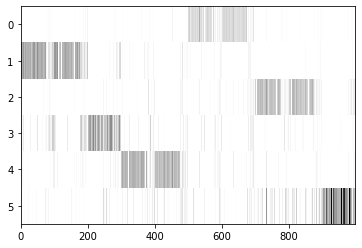

In [14]:
plt.imshow(S2,aspect='auto',cmap='binary',interpolation='none')

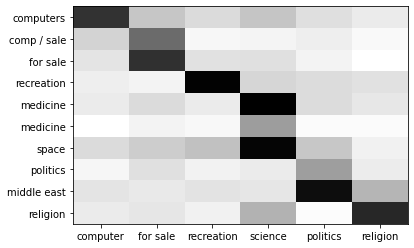

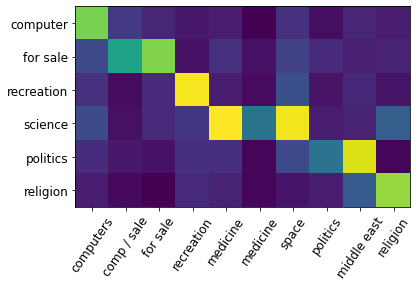

In [25]:
x_order = [1,3,4,0,2,5]
y_order = [2,9,8,7,1,6,5,0,3,4]
labels_6 = np.asarray(['science', 'computer', 'politics', 'for sale', 'recreation', 'religion'])
labels_10 = np.asarray(['politics', 'medicine', 'computers', 'middle east', 'religion', 
             'space', 'medicine', 'recreation', 'for sale', 'comp / sale'])
plt.imshow(A2[y_order,:][:,x_order],aspect='auto',cmap='binary',interpolation='none')
plt.xticks(range(6), labels_6[x_order], fontsize=10)
plt.yticks(range(10), labels_10[y_order], fontsize=10)
plt.show()

plt.imshow(A2[y_order,:][:,x_order].T)
plt.yticks(range(6), labels_6[x_order], fontsize=12)
plt.xticks(range(10), labels_10[y_order], fontsize=12, rotation=55)
plt.show()

In [16]:
#calculate reconstruction error
layer1_error = np.linalg.norm(X - A1 @ S1)
layer2_error = np.linalg.norm(X - A1 @ A2 @ S2)

print("Layer 1 error...    " + str(layer1_error))
print("Layer 2 error...    " + str(layer2_error))

Layer 1 error...    30.785859267758976
Layer 2 error...    30.9496319735179


In [18]:
keywords = np.empty((12,10), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(A1.shape[1]):
    #col = A1[:,i]*7/6 - np.mean(A1,axis=1)
    col = A1[:,y_order[i]]*7/6 - np.mean(A1,axis=1)
    top = col.argsort()
    top = top[-10:][::-1]

    keywords[2:,i] = idx_to_word[top] 

print("RANK 10 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(0,5)))
print("")
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(5,10)))


keywords = np.empty((12,6), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

A = A1 @ A2
for i in range(A.shape[1]):
    #col = A[:,i]*7/6 - np.mean(A,axis=1)
    col = A[:,x_order[i]]*7/6 - np.mean(A,axis=1)
    top = col.argsort()
    top = top[-10:][::-1]

    keywords[2:,i] = idx_to_word[top] 

print("")
print("RANK 6 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))


RANK 10 KEYWORDS:
------------------
Topic 1    Topic 2    Topic 3   Topic 4     Topic 5    
-------    -------    -------   -------     -------    
drive      new        sale      bike        msg        
apple      dj         offer     dod         food       
video      following  drive     motorcycle  used       
mhz        st         mb        helmet      object     
card       computer   best      games       dietz      
graphics   fm         color     stadium     disease    
mac        mower      software  got         responses  
sound      sold       disks     baseball    patients   
powerbook  battery    game      year        diet       
know       remains    shipping  players     epilepsy   

Topic 6     Topic 7  Topic 8      Topic 9     Topic 10     
-------     -------  -------      -------     -------      
geb         space    humanist     people      jesus        
pitt        launch   article      gun         god          
banks       nasa     politics     israel      peop

In [19]:
keywords = np.empty((12,10), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(A1.shape[1]):
    #col = A1[:,i]*7/6 - np.mean(A1,axis=1)
    col = A1[:,y_order[i]]*7/6 - np.mean(A1,axis=1)
    top = col.argsort()
    top = top[-10:][::-1]

    keywords[2:,i] = idx_to_word[top] 

print("RANK 10 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for i, row in enumerate(keywords):
    print(" & ".join([str(i-1)] + [row[i] for i in range(len(row))]) + " \\\\")

keywords = np.empty((12,6), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

A = A1 @ A2
for i in range(A.shape[1]):
    #col = A[:,i]*7/6 - np.mean(A,axis=1)
    col = A[:,x_order[i]]*7/6 - np.mean(A,axis=1)
    top = col.argsort()
    top = top[-10:][::-1]

    keywords[2:,i] = idx_to_word[top] 

print("")
print("RANK 6 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for i, row in enumerate(keywords):
    print(" & ".join([str(i-1)] + [row[i] for i in range(len(row))]) + " \\\\")


RANK 10 KEYWORDS:
------------------
-1 & Topic 1 & Topic 2 & Topic 3 & Topic 4 & Topic 5 & Topic 6 & Topic 7 & Topic 8 & Topic 9 & Topic 10 \\
0 & ------- & ------- & ------- & ------- & ------- & ------- & ------- & ------- & ------- & ------- \\
1 & drive & new & sale & bike & msg & geb & space & humanist & people & jesus \\
2 & apple & dj & offer & dod & food & pitt & launch & article & gun & god \\
3 & video & following & drive & motorcycle & used & banks & nasa & politics & israel & people \\
4 & mhz & st & mb & helmet & object & gordon & shuttle & omran & fbi & bible \\
5 & card & computer & best & games & dietz & njxp & moon & bedouin & government & christians \\
6 & graphics & fm & color & stadium & disease & chastity & ideas & backcountry & us & israel \\
7 & mac & mower & software & got & responses & cadre & orbit & speaking & say & christian \\
8 & sound & sold & disks & baseball & patients & skepticism & lunar & liar & arab & religion \\
9 & powerbook & battery & game & ye

In [22]:
keywords = np.empty((12,10), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(A1.shape[1]):
    col = A1[:,i]
    top = col.argsort()
    top = top[-10:][::-1]

    keywords[2:,i] = idx_to_word[top] 

print("RANK 10 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(0,5)))
print("")
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(5,10)))


keywords = np.empty((12,6), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

A = A1 @ A2
for i in range(A.shape[1]):
    col = A[:,i]
    top = col.argsort()
    top = top[-10:][::-1]

    keywords[2:,i] = idx_to_word[top] 
print("")
print("RANK 6 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))


RANK 10 KEYWORDS:
------------------
Topic 1      Topic 2    Topic 3   Topic 4     Topic 5     
-------      -------    -------   -------     -------     
article      msg        drive     people      jesus       
humanist     used       know      israel      people      
politics     food       apple     gun         god         
omran        disease    video     us          bible       
bedouin      object     card      fbi         christians  
backcountry  dietz      mhz       government  israel      
speaking     use        system    say         know        
liar         responses  mac       know        christian   
john         patients   graphics  see         order       
absood       diet       sound     jews        religion    

Topic 6  Topic 7     Topic 8     Topic 9   Topic 10   
-------  -------     -------     -------   -------    
space    geb         bike        sale      new        
launch   pitt        motorcycle  drive     dj         
nasa     banks       dod         o